# **Credit Card Fraud Detection**

### **Problem Statement:**

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In this project we will detect fraudulent credit card transactions with the help of Machine learning models. We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

### **Data Understanding :**

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from 'time' and 'amount', all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

### **Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import  stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import average_precision_score,precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Exploratory Data Analysis**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#checking the shape
df.shape

(284807, 31)

In [5]:
#checking the datatypes and null/not-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking the distribution of the target variable
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#checking the class distribution of the target variable
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

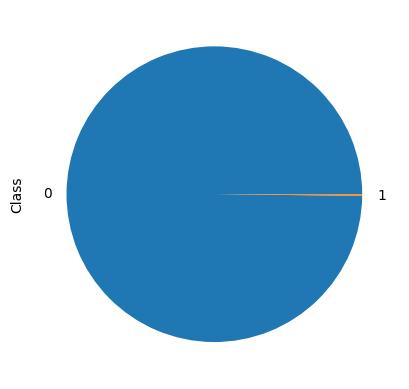

In [8]:
#checking the class distribution of the target variable in percentage
print ((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [9]:
#checking the % distribution of normal vs fraud
classes =df['Class'].value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share = classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


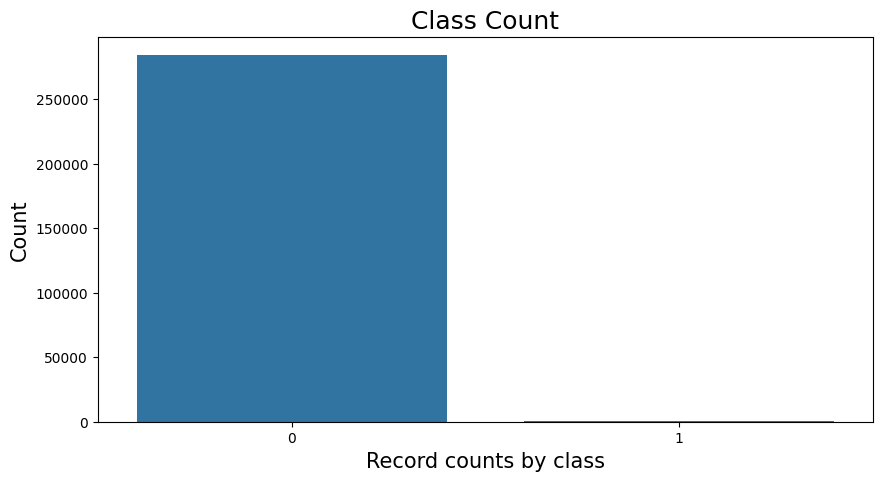

In [10]:
#create a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10,5))
sns.countplot(x='Class',data=df)
plt.title("Class Count",fontsize=18)
plt.xlabel("Record counts by class",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [11]:
#checking the correlation
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


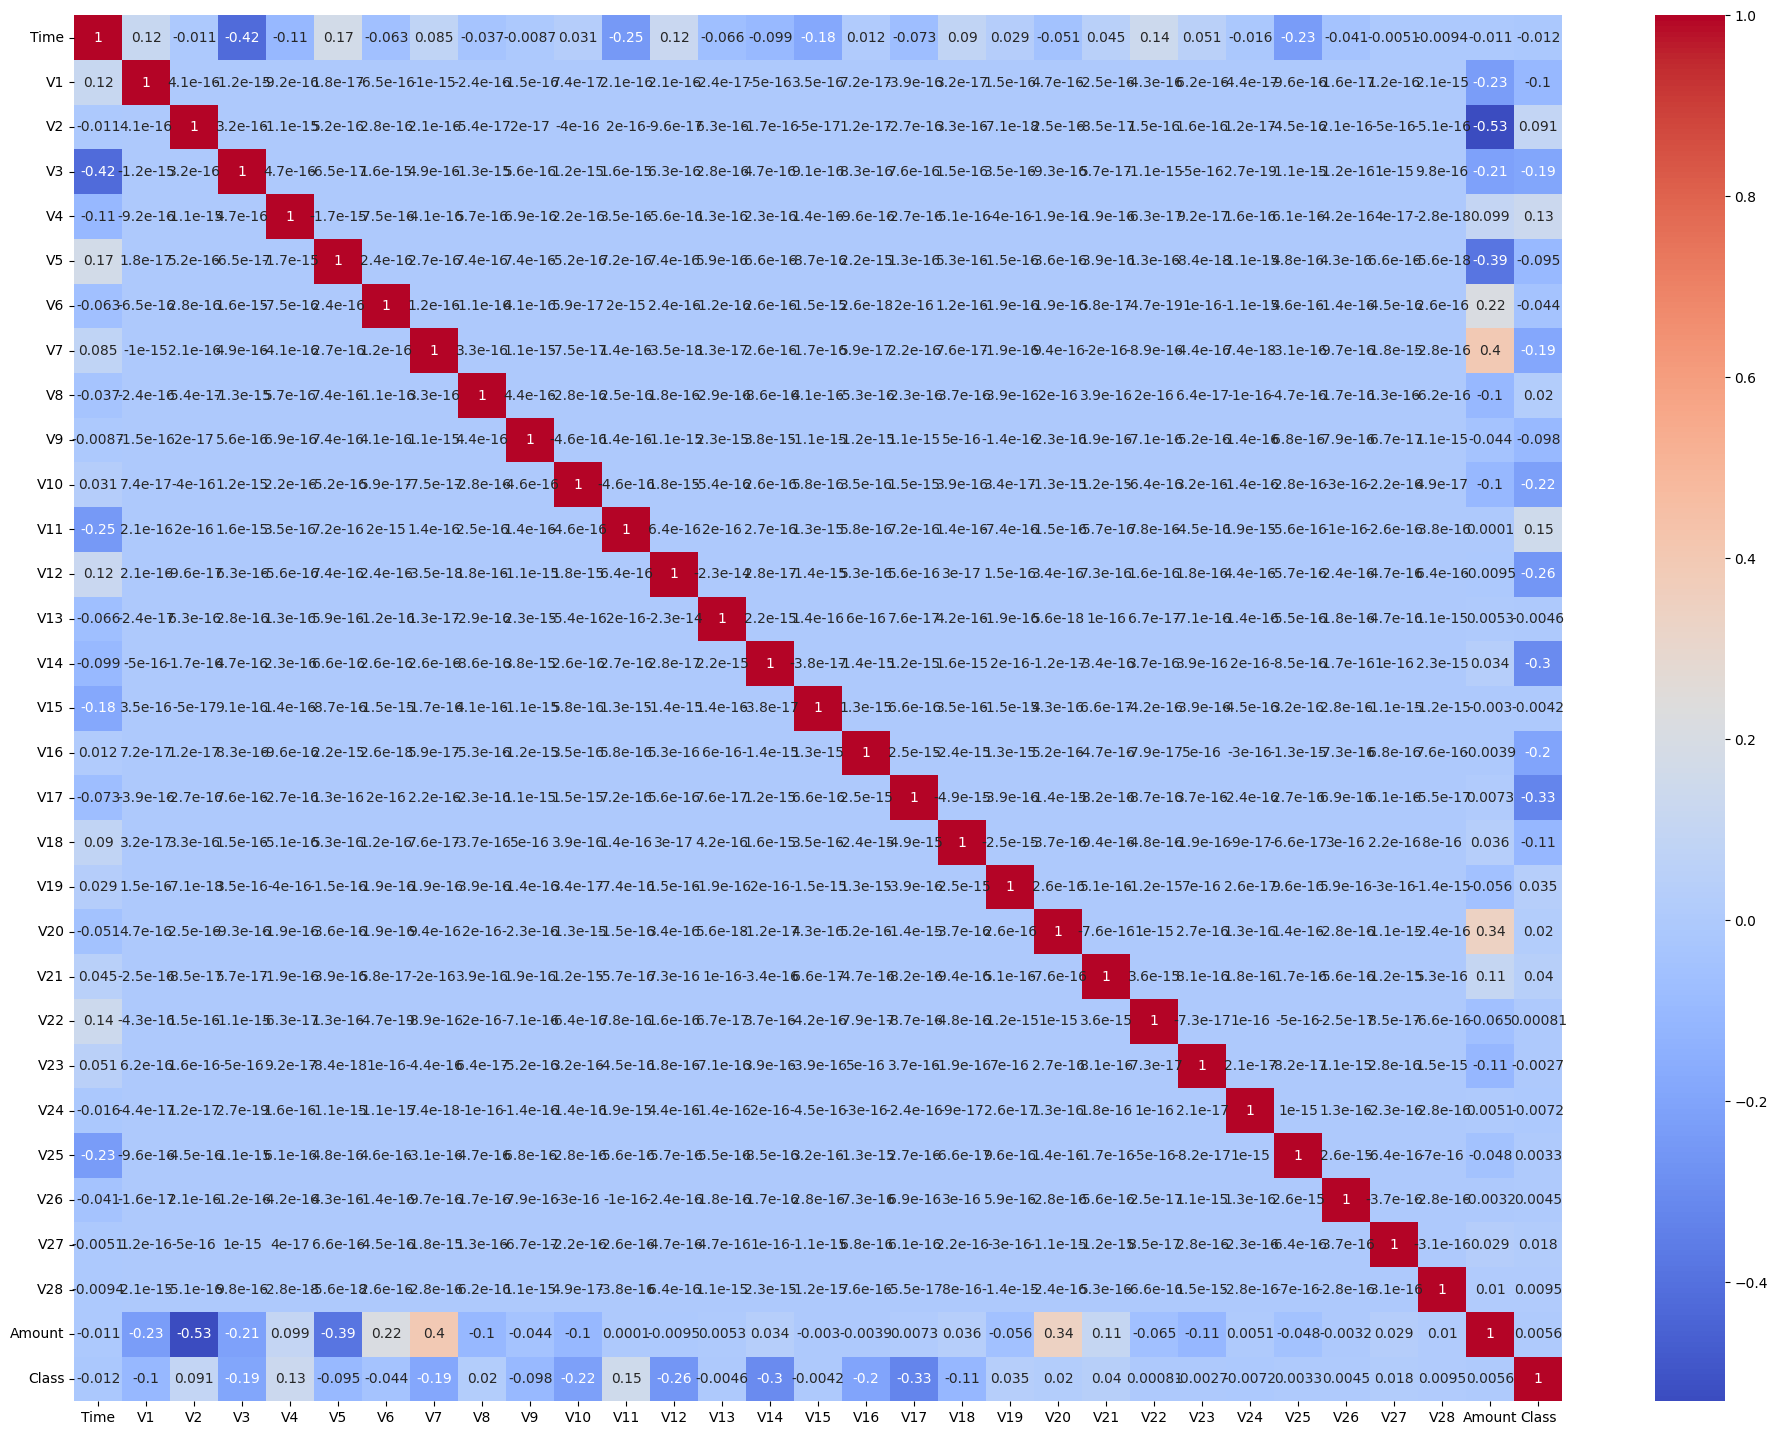

In [12]:
#checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

**Here we will observe the distribution of our classes**

In [13]:
#As time is given in relative fashion, we are using pandas. Timedelta which Represents a duration, the difference between two timer dates
Delta_Time =pd.to_timedelta(df['Time'],unit='s')

#Create derived columns Mins and Hours
df['Time_Day']=(Delta_Time.dt.components.days).astype(int)
df['Time_Hour']=(Delta_Time.dt.components.hours).astype(int)
df['Time_Min']=(Delta_Time.dt.components.minutes).astype(int)


In [14]:
#Drop unnecessary columns
#we will drop Time, as we have derived the Day/Hour/Minutes from the time column
df.drop(['Time'],axis=1,inplace=True)
#we will keep only derived column hour , as day/minutes might not be very useful
df.drop(['Time_Day','Time_Min'],axis=1,inplace=True)

### **Splitting the data into train and test data**

In [15]:
#Splitting the dataset into X and y
y=df['Class']
X=df.drop(['Class'],axis=1)

In [16]:
#checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
#checking some rows of y
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [18]:
#splitting the dataset using train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


Preserve X_test and y_test to evaluate on the test data once you build the model

In [19]:
#checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


Plotting the distribution of a variable

In [20]:
#Accumulating all the column names under one variable
cols=list(X.columns)

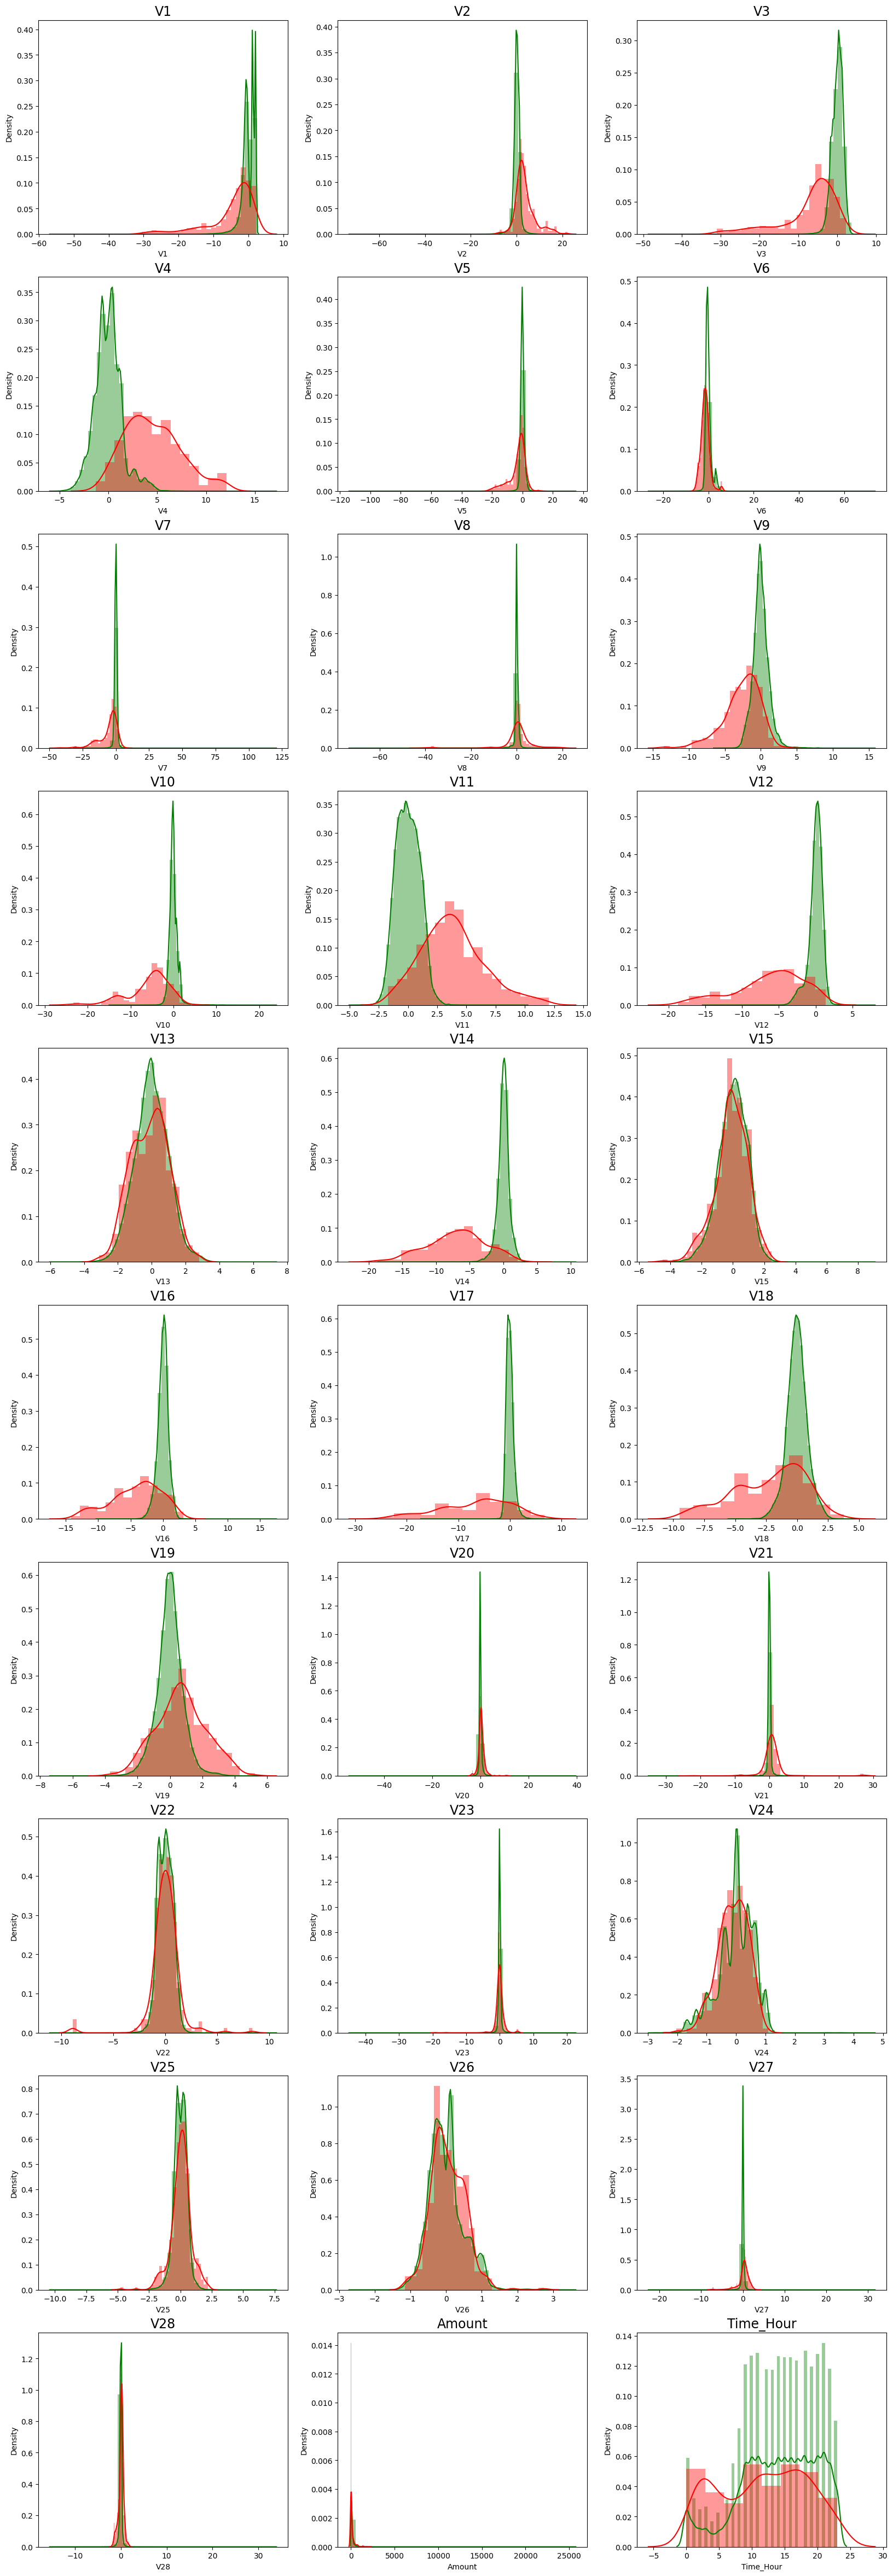

In [21]:
#plot the histogram of a variable from the dataset to see the skewness
normal_records=df.Class==0
fraud_records=df.Class==1

plt.figure(figsize=(20,60))
for n,col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records],color='green')
  sns.distplot(X[col][fraud_records],color='red')
  plt.title(col,fontsize=17)
plt.show()

## **Model Building**


In [22]:
#Create a dataframe to store results
df_Results=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])


In [23]:
#Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, y_pred_l2, title="Confusion Matrix-Test Data"):
  cm=confusion_matrix(y_test,y_pred_l2)
  plt.clf()
  plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Accent)
  categoryNames=['Non-Fraudulent','Fraudulent']
  plt.title('Confusion Matrix-Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks=np.arange(len(categoryNames))
  plt.xticks(ticks,categoryNames,rotation=45)
  plt.yticks(ticks,categoryNames)
  s=[['TN','FP'],['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]),fontsize=12)
  plt.show()

In [24]:
def buildAndRunLogisticModels(df_Results, Methodology, X_train, X_test, y_train, y_test):
    print("Inside buildAndRunLogisticModels:")
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)

    # Logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
    import matplotlib.pyplot as plt

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        cv=cv_num,
        penalty='l2',
        scoring='roc_auc',
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg'
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        cv=cv_num,
        penalty='l1',
        scoring='roc_auc',
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear'
    )

    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print("Parameters for l1 regularisation")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    print("Parameters for l2 regularisation")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    # Predictions
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_prob_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_prob_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Accuracy
    Accuracy_l2 = metrics.accuracy_score(y_test, y_pred_l2)
    Accuracy_l1 = metrics.accuracy_score(y_test, y_pred_l1)

    print("Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2,title="Confusion Matrix - Logistic Regression (L2)")
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    print("Accuracy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1,title="Confusion Matrix - Logistic Regression (L1)")
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    # ROC for L2
    l2_roc_value = roc_auc_score(y_test, y_pred_prob_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds_l2 = metrics.roc_curve(y_test, y_pred_prob_l2)
    best_threshold_l2 = thresholds_l2[np.argmax(tpr - fpr)]
    print("l2 threshold: {0}".format(best_threshold_l2))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="L2 Test AUC=" + str(round(roc_auc, 4)))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([
        df_Results,
        pd.DataFrame([{
            'Methodology': Methodology,
            'Model': 'Logistic regression with L2 Regularisation',
            'Accuracy': Accuracy_l2,
            'roc_value': l2_roc_value,
            'threshold': best_threshold_l2
        }])
    ], ignore_index=True)

    # ROC for L1
    l1_roc_value = roc_auc_score(y_test, y_pred_prob_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds_l1 = metrics.roc_curve(y_test, y_pred_prob_l1)
    best_threshold_l1 = thresholds_l1[np.argmax(tpr - fpr)]
    print("l1 threshold: {0}".format(best_threshold_l1))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="L1 Test AUC=" + str(round(roc_auc, 4)))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([
        df_Results,
        pd.DataFrame([{
            'Methodology': Methodology,
            'Model': 'Logistic regression with L1 Regularisation',
            'Accuracy': Accuracy_l1,
            'roc_value': l1_roc_value,
            'threshold': best_threshold_l1
        }])
    ], ignore_index=True)

    return df_Results




In [25]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

    # create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("model score")
    print(score)

    # Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification report")
    print(classification_report(y_test, y_pred))

    # ROC & Threshold
    knn_probs = knn.predict_proba(X_test)[:, 1]
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results
    df_Results = pd.concat([df_Results, pd.DataFrame([{
    'Methodology': Methodology,
    'Model': 'KNN',
    'Accuracy': score,
    'roc_value': knn_roc_value,
    'Threshold': threshold
    }])], ignore_index=True)


    return df_Results


In [26]:
# Created a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):

    #Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria = ['gini', 'entropy']
    scores = {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores[c] = test_score
        print(c + " score: {}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test,y_pred))
        print(c + " tree_roc_value: {}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()

        df_Results = pd.concat([df_Results, pd.DataFrame([{
       'Methodology': Methodology,
       'Model': f'Tree Model with {c} criteria',
       'Accuracy': test_score,
       'ROC_AUC': tree_roc_value,
       'Threshold': threshold
       }])], ignore_index=True)


    return df_Results


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics  # ✅ Needed for roc_curve and auc
import numpy as np
import matplotlib.pyplot as plt

# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate Random Forest model

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                                      bootstrap=True,
                                      max_features='sqrt',
                                      random_state=42)

    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {}'.format(RF_test_score))

    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)  # Assumed defined elsewhere
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)
    print("Random Forest roc_value: {}".format(roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest threshold: {}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame([{
    'Methodology': Methodology,
    'Model': 'Random Forest',
    'Accuracy': RF_test_score,
    'ROC_AUC': roc_value,
    'Threshold': threshold
    }])], ignore_index=True)


    return df_Results


In [28]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate XGBoost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print("Model Accuracy: {}".format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print("XGboost roc_value: {}".format(XGB_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGboost threshold: {}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame([{
    'Methodology': Methodology,
    'Model': 'XGBoost',
    'Accuracy': XGB_test_score,
    'ROC_AUC': XGB_roc_value,
    'Threshold': threshold
}])], ignore_index=True)


    return df_Results


In [29]:
def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate SVM model with sigmoid kernel
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
    from sklearn import metrics
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score : {}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier
    classifier = SVC(kernel='sigmoid')
    classifier.fit(X_train, y_train)
    svm_probs = classifier.decision_function(X_test)


    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    print("svm roc_value: {}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("svm threshold: {}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc= " + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame([{
    'Methodology': Methodology,
    'Model': 'SVM',
    'Accuracy': SVM_Score,
    'roc_value': roc_value
}])], ignore_index=True)


    return df_Results


**Perform Cross Validation with RepeatedKFold**

In [30]:
# Lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     15     23 ... 284796 284800 284802]
TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0     24     27 ... 284795 284799 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5      6 ... 284770 284776 284786]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     4      7     11 ... 284793 284798 284804]
TRAIN: [     0      1      3 ... 284802 284804 284806] TEST: [     2     10     12 ... 284801 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    10     14     17 ... 284756 284784 284803]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     11     12 ... 284795 284801 284802]
TRAIN: [     0      1      2 ... 284802 284803 284805] TEST: [     8     18     26 ... 284799 284804 284806]
TRAIN: [     3      7      8 ... 284804 284805 284806] TEST: [     0      1      2 ... 284790 284791 284800]
TRAIN: [     0     

Logistic Regression with L1 and L2 Regularisation
Inside buildAndRunLogisticModels:
X_train shape: (227846, 30)
y_train shape: (227846,)
X_test shape: (56961, 30)
y_test shape: (56961,)
Max auc_roc for l1: 0.9773856624005098
Max auc_roc for l2: 0.9820633496053996
Parameters for l1 regularisation
[[ 9.96563180e-03  0.00000000e+00  0.00000000e+00  5.44137943e-01
   6.40439681e-02 -4.06658507e-02  0.00000000e+00 -1.89634770e-01
  -1.49398762e-01 -4.55698276e-01  0.00000000e+00  0.00000000e+00
  -2.21902962e-01 -6.40164490e-01  0.00000000e+00 -2.35004942e-01
  -2.11204295e-02  0.00000000e+00  0.00000000e+00 -1.00108048e-01
   2.44382545e-01  3.24864054e-01 -6.95002329e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.88474717e-01 -2.41664371e-02
   5.00722288e-05 -1.65686161e-02]]
[-7.91967056]
{np.int64(1): array([[0.5       , 0.5       , 0.5       , 0.5       , 0.44024239,
        0.44720126, 0.47086593, 0.7987529 , 0.95260911, 0.97870895,
        0.97905432, 0.97835353, 0.9783083

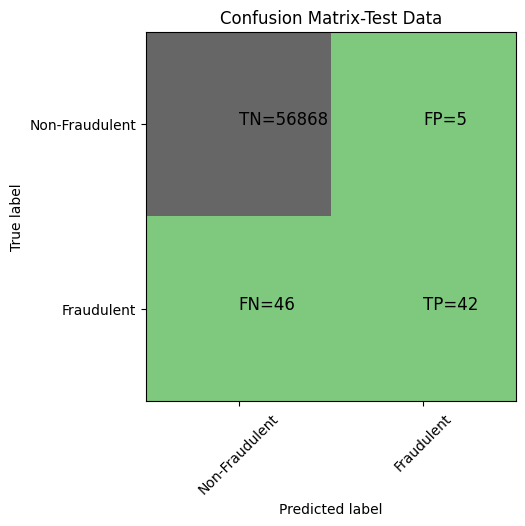

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.89      0.48      0.62        88

    accuracy                           1.00     56961
   macro avg       0.95      0.74      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9992099857797441
Confusion Matrix


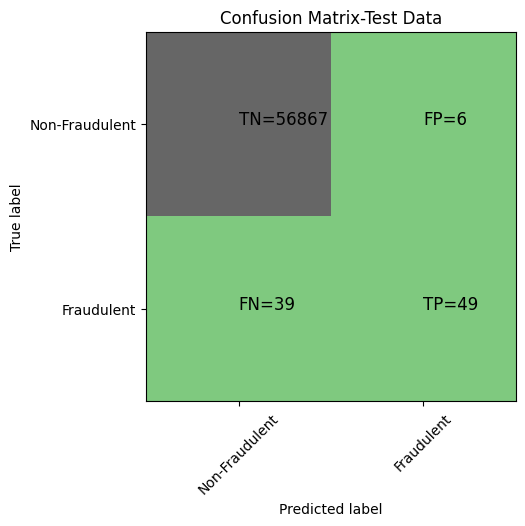

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.89      0.56      0.69        88

    accuracy                           1.00     56961
   macro avg       0.95      0.78      0.84     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9854148717317532
l2 threshold: 0.0026001168763088245
ROC for the test dataset 98.5%


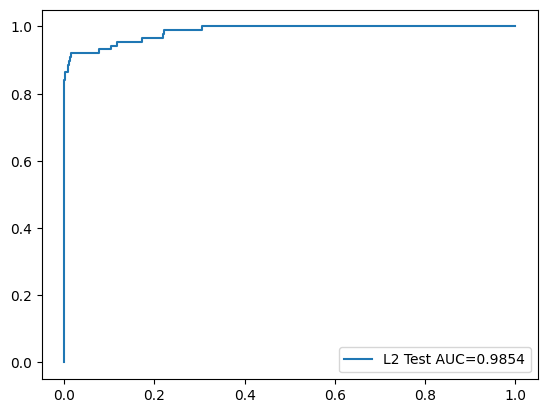

l1 roc_value: 0.9778287907826528
l1 threshold: 0.0019215131695183836
ROC for the test dataset 97.8%


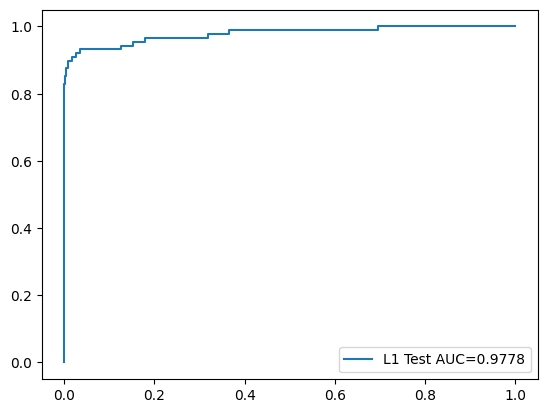

Time Taken by Model: --- 1576.98 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9993153210091115
Confusion Matrix


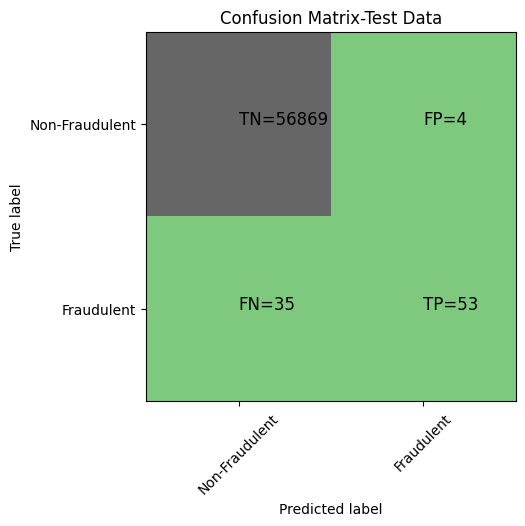

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.93      0.60      0.73        88

    accuracy                           1.00     56961
   macro avg       0.96      0.80      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8747928998102631
KNN threshold: 0.2
ROC for the test dataset 87.5%


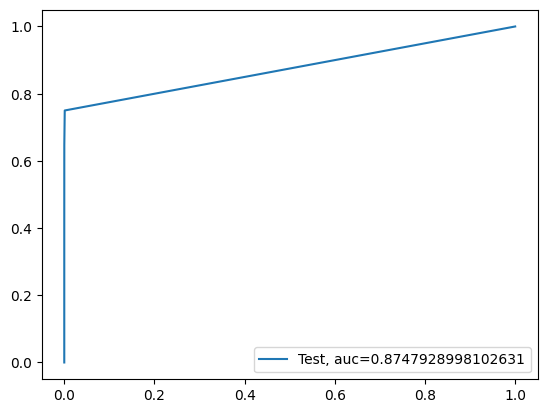

Time Taken by Model: --- 323.71 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.999280209265989
Confusion Matrix


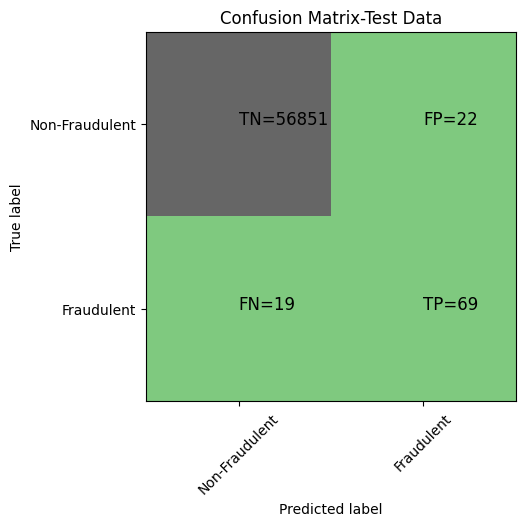

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.76      0.78      0.77        88

    accuracy                           1.00     56961
   macro avg       0.88      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8918520411506978
Tree threshold: 1.0
ROC for the test dataset 89.2%


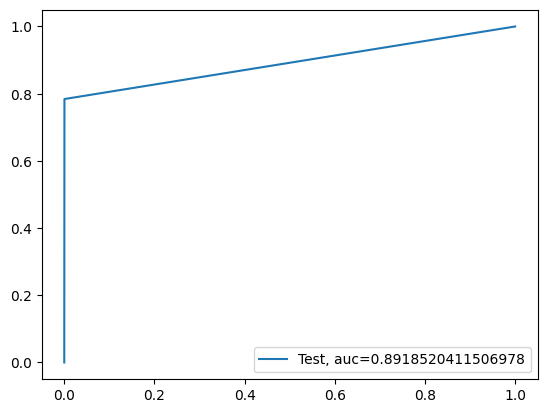

entropy score: 0.9991397622934991
Confusion Matrix


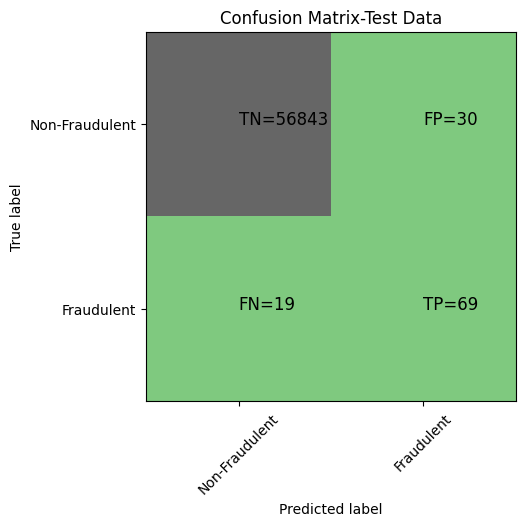

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.70      0.78      0.74        88

    accuracy                           1.00     56961
   macro avg       0.85      0.89      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8917817090071499
Tree threshold: 1.0
ROC for the test dataset 89.2%


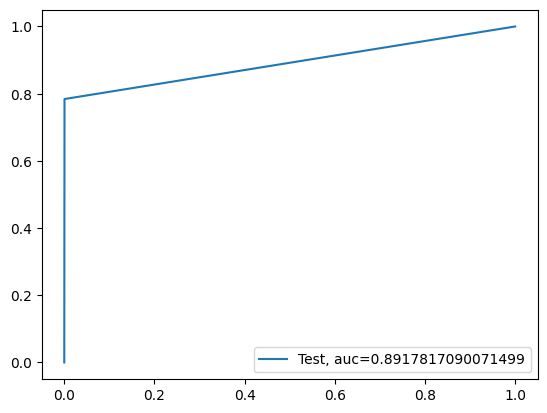

Time Taken by Model: --- 47.63 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996137708256526
Confusion Matrix


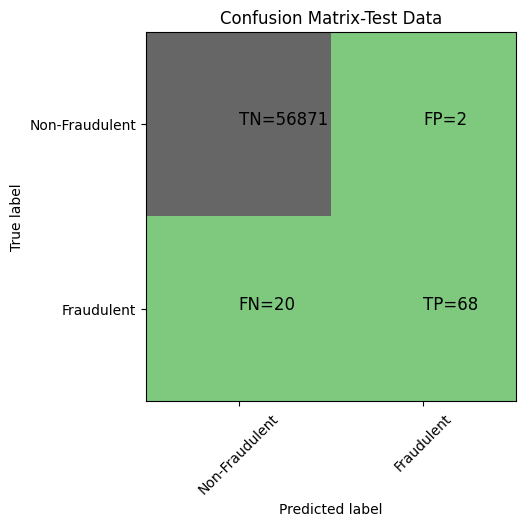

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.97      0.77      0.86        88

    accuracy                           1.00     56961
   macro avg       0.99      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9475174351785398
Random Forest threshold: 0.02
ROC for the test dataset 94.8%


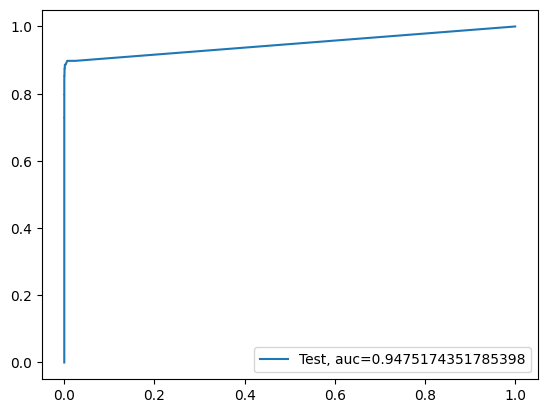

Time Taken by Model: --- 376.40 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


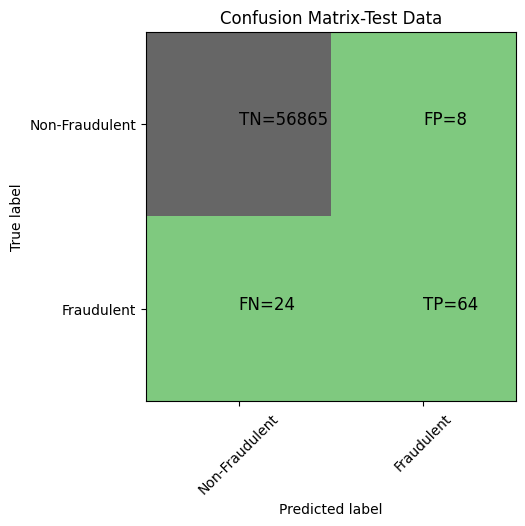

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.89      0.73      0.80        88

    accuracy                           1.00     56961
   macro avg       0.94      0.86      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9151550583996559
XGboost threshold: 0.0004095044278074056
ROC for the test dataset 91.5%


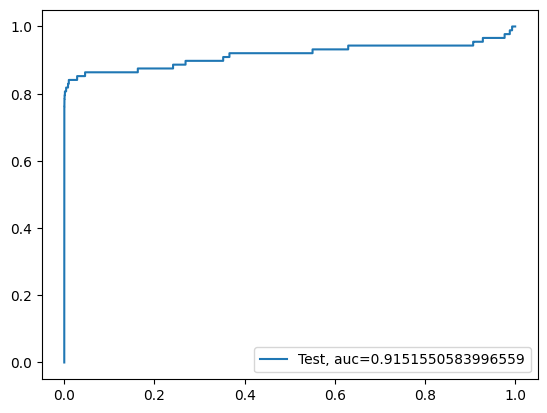

Time Taken by Model: --- 4.86 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.998560418531978
Confusion Matrix


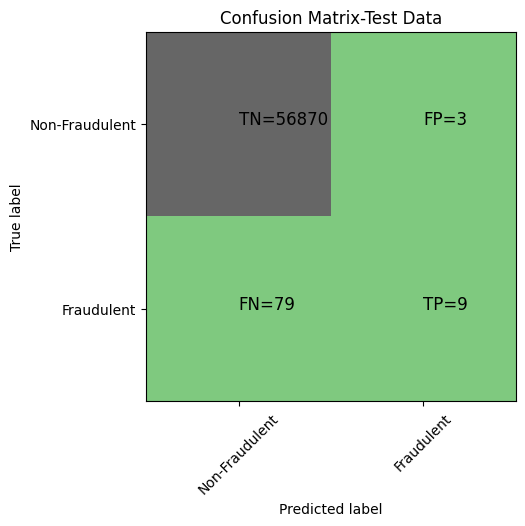

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.75      0.10      0.18        88

    accuracy                           1.00     56961
   macro avg       0.87      0.55      0.59     56961
weighted avg       1.00      1.00      1.00     56961

svm roc_value: 0.4858680345202948
svm threshold: -0.745043390726396
ROC for the test dataset: 48.6%


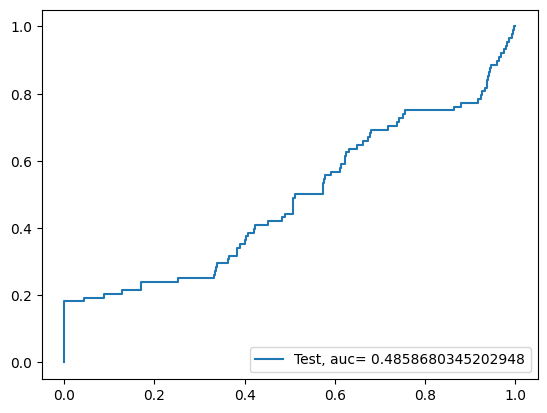

Time Taken by Model: --- 62.44 seconds ---
------------------------------------------------------------


In [31]:
# -----------------------------------------------
# Run Logistic Regression with L1 and L2 Regularisation
# -----------------------------------------------
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, X_test_cv, y_train_cv, y_test_cv)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print("-" * 60)

# -----------------------------------------------
# Run K-Nearest Neighbors (KNN) Model
# -----------------------------------------------
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(
    df_Results,
    "RepeatedKFold Cross Validation",
    X_train_cv, y_train_cv,
    X_test_cv, y_test_cv
)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print("-" * 60)

# -----------------------------------------------
# Run Decision Tree Models with 'gini' & 'entropy'
# -----------------------------------------------
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(
    df_Results,
    "RepeatedKFold Cross Validation",
    X_train_cv, y_train_cv,
    X_test_cv, y_test_cv
)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print("-" * 60)

# -----------------------------------------------
# Run Random Forest Model
# -----------------------------------------------
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(
    df_Results,
    "RepeatedKFold Cross Validation",
    X_train_cv, y_train_cv,
    X_test_cv, y_test_cv
)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print("-" * 60)

# -----------------------------------------------
# Run XGBoost Model
# -----------------------------------------------
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(
    df_Results,
    "RepeatedKFold Cross Validation",
    X_train_cv, y_train_cv,
    X_test_cv, y_test_cv
)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print("-" * 60)

# -----------------------------------------------
# Run SVM Model with Sigmoid Kernel
# -----------------------------------------------
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(
    df_Results,
    "RepeatedKFold Cross Validation",
    X_train_cv, y_train_cv,
    X_test_cv, y_test_cv
)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print("-" * 60)


In [32]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,Threshold,ROC_AUC
0,RepeatedKFold Cross Validation,Logistic regression with L2 Regularisation,0.999105,0.985415,0.002600,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic regression with L1 Regularisation,0.999210,0.977829,0.001922,NaN,NaN
2,RepeatedKFold Cross Validation,KNN,0.999315,0.874793,NaN,0.20000,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999280,NaN,NaN,1.00000,0.891852
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999140,NaN,NaN,1.00000,0.891782
5,RepeatedKFold Cross Validation,Random Forest,0.999614,NaN,NaN,0.02000,0.947517
6,RepeatedKFold Cross Validation,XGBoost,0.999438,NaN,NaN,0.00041,0.915155
7,RepeatedKFold Cross Validation,SVM,0.998560,0.485868,NaN,NaN,NaN


Results for cross validation with RepeatedKFold
Looking at Accuracy and ROC Value, we have "Logistic Regression with L2 Regularisation" which has provided best results for cross validation with RepeatedKFold Technique

**Perform Cross Validation with StratifiedKFold**

In [64]:
from sklearn.model_selection import StratifiedKFold

# X is the feature set and y is the target
# For demonstration purposes, let's create dummy data similar to the output's scale
# import numpy as np
# num_samples = 284807  # Approximate number of samples based on the output
# X = np.arange(num_samples).reshape(-1, 1) # Dummy feature set
# y = np.random.randint(0, 2, num_samples) # Dummy target (e.g., binary classification)

skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 56737  56738  56741 ... 284804 284805 284806] TEST: [    0     1     2 ... 57214 57215 57219]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 56737  56738  56741 ... 114130 114131 114132]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [113719 113720 113721 ... 171230 171233 171235]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [170528 170530 170531 ... 228101 228102 228104]
TRAIN: [     0      1      2 ... 228101 228102 228104] TEST: [227600 227603 227605 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Inside buildAndRunLogisticModels:
X_train shape: (227846, 1)
y_train shape: (227846,)
X_test shape: (56961, 1)
y_test shape: (56961,)
Max auc_roc for l1: 0.5017818237517064
Max auc_roc for l2: 0.5017818237517064
Parameters for l1 regularisation
[[3.05717061e-08]]
[0.]
{np.int64(1): array([[0.5       , 0.5       , 0.5       , 0.49833999, 0.49833999,
        0.49833999, 0.49833999, 0.49833999, 0.49833999, 0.49833999,
        0.49833999, 0.49833999, 0.49833999, 0.49833999, 0.49833999,
        0.49833999, 0.49833999, 0.49833999, 0.49833999, 0.49833999],
       [0.5       , 0.5       , 0.5       , 0.50502195, 0.50502195,
        0.50502195, 0.50502195, 0.50502195, 0.50502195, 0.50502195,
        0.50502195, 0.50502195, 0.50502195, 0.50502195, 0.50502195,
        0.50502195, 0.50502195, 0.50502195, 0.50502195, 0.50502195],
       [0.5       , 0.5       , 0.5       , 0.50355144, 0.50355144,
        0.50355144, 0.50355144, 0.50355144, 0.5035514

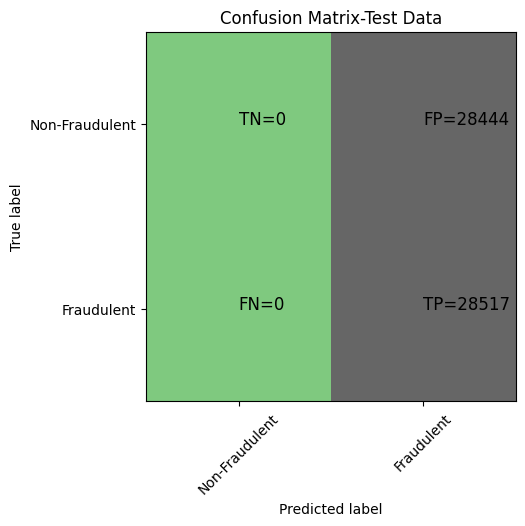

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

Accuracy of Logistic model with l1 regularisation : 0.5006407893119854
Confusion Matrix


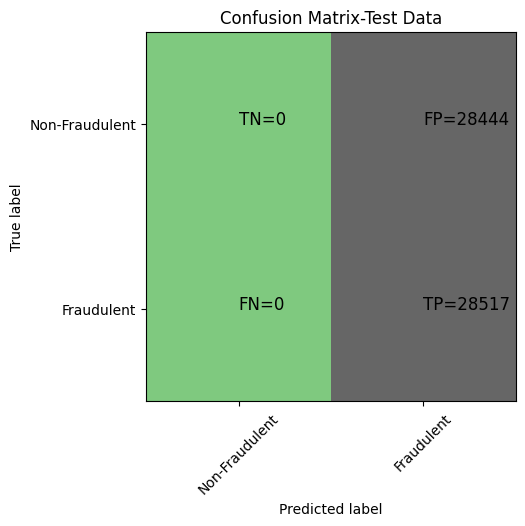

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

l2 roc_value: 0.5069377407245854
l2 threshold: 0.5040059141094307
ROC for the test dataset 50.7%


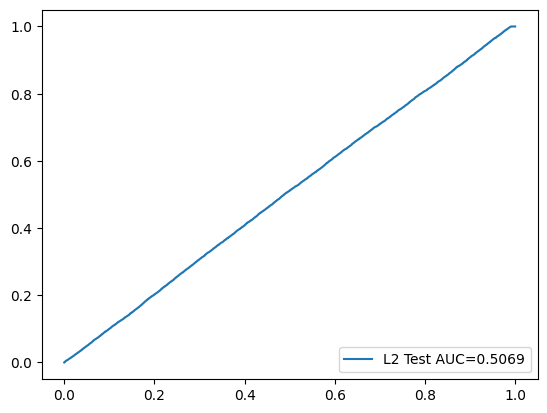

l1 roc_value: 0.5069377407245854
l1 threshold: 0.5019611037461819
ROC for the test dataset 50.7%


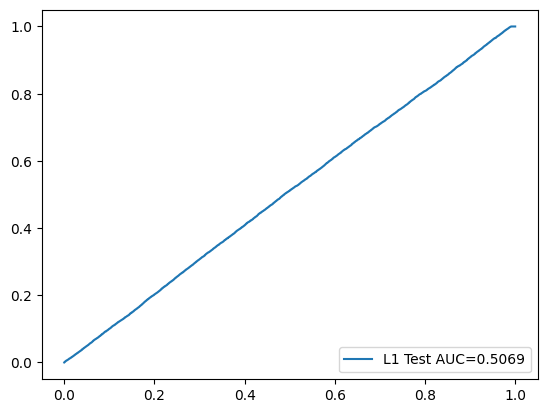

Time Taken by Model: --- 30.683374643325806 seconds ---
------------------------------------------------------------
KNN Model
model score
0.5006407893119854
Confusion Matrix


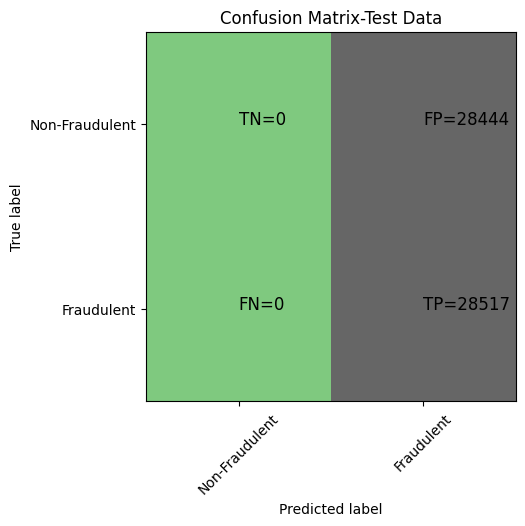

classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

KNN roc_value: 0.500035156799325
KNN threshold: 1.0
ROC for the test dataset 50.0%


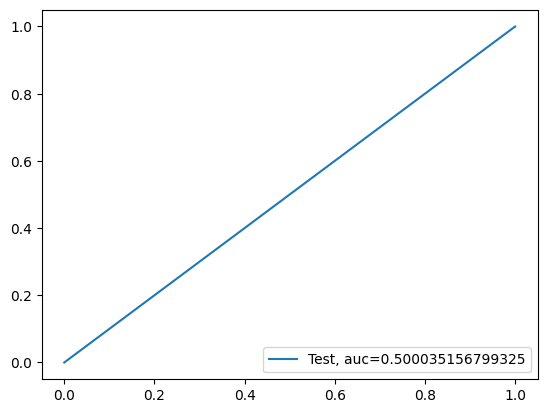

Time Taken by Model: --- 0.7334625720977783 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.5006407893119854
Confusion Matrix


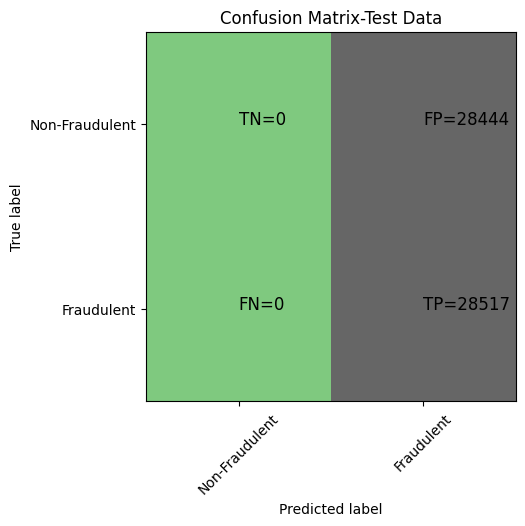

classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

gini tree_roc_value: 0.5
Tree threshold: inf
ROC for the test dataset 50.0%


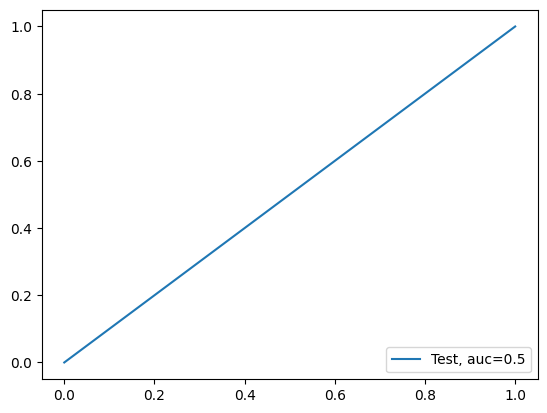

entropy score: 0.5006407893119854
Confusion Matrix


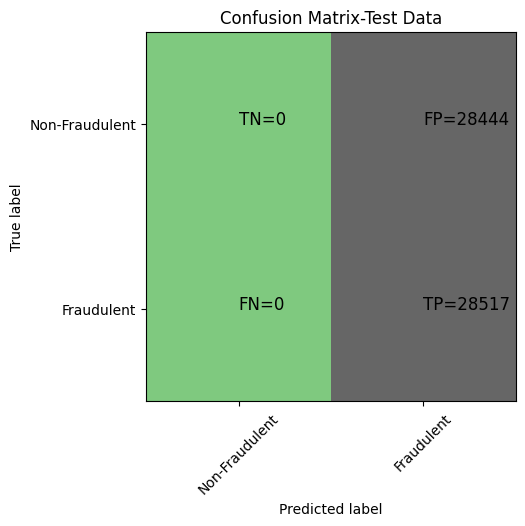

classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

entropy tree_roc_value: 0.5
Tree threshold: inf
ROC for the test dataset 50.0%


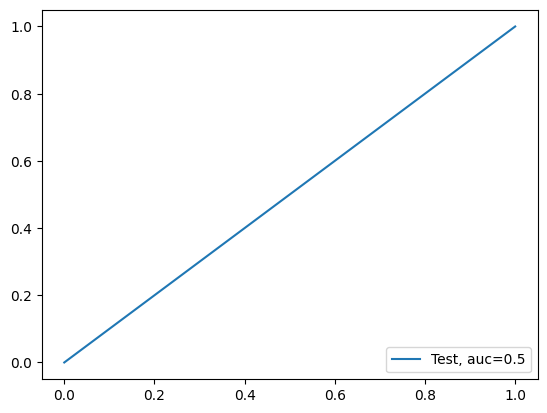

Time Taken by Model: --- 14.07523226737976 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.5006407893119854
Confusion Matrix


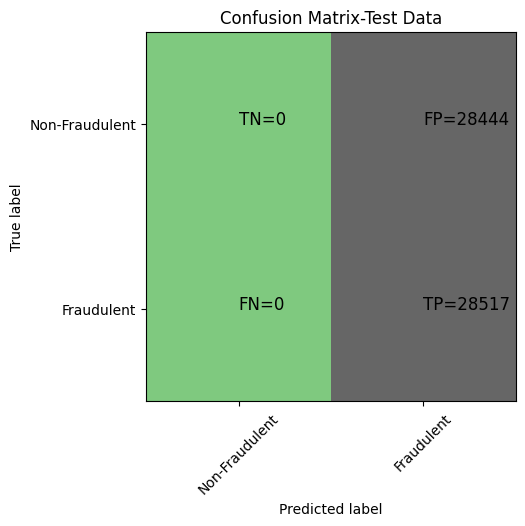

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

Random Forest roc_value: 0.5000175783996625
Random Forest threshold: 1.0
ROC for the test dataset 50.0%


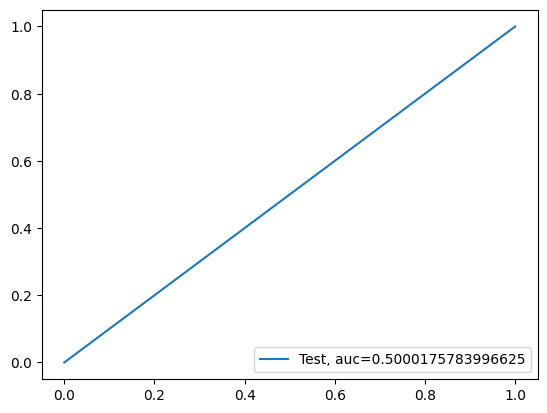

Time Taken by Model: --- 294.668434381485 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.5006407893119854
Confusion Matrix


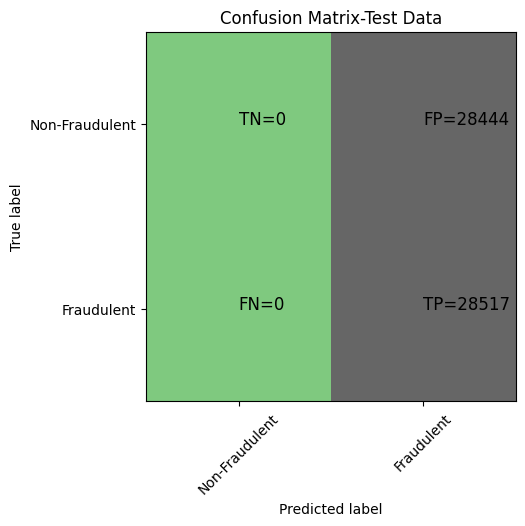

classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

XGboost roc_value: 0.5
XGboost threshold: inf
ROC for the test dataset 50.0%


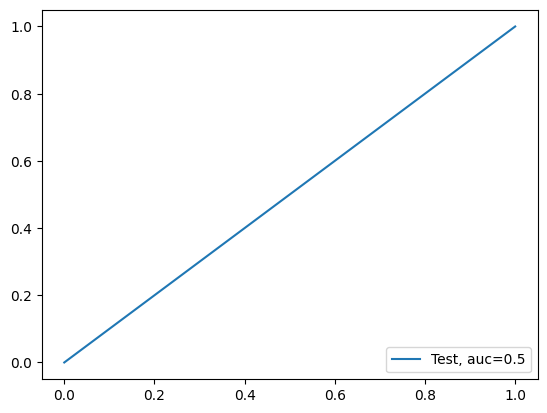

Time Taken by Model: --- 2.413689613342285 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.4993592106880146
Confusion Matrix


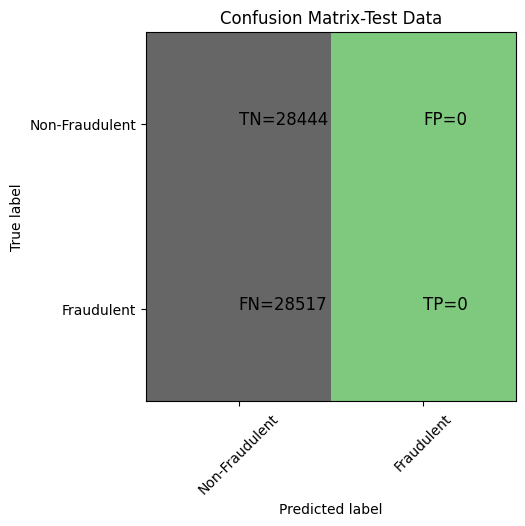

classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     28444
           1       0.00      0.00      0.00     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

svm roc_value: 0.4930622592754145
svm threshold: -6526.069026713412
ROC for the test dataset: 49.3%


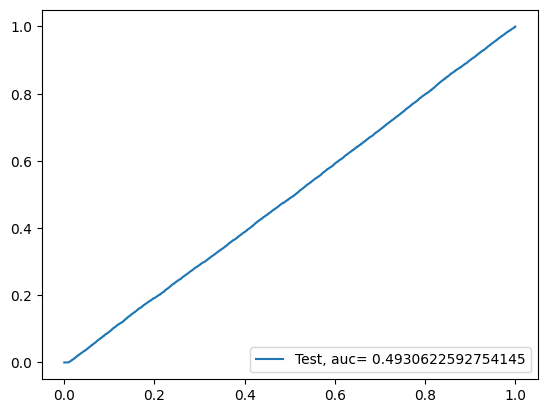

Time Taken by Model: --- 4057.9364745616913 seconds ---


In [34]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,X_test_SKF_cv,y_train_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-"*60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-"*60)

#Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-"*60)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-"*60)

#Run XGBoost Models
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-"*60)

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [35]:
# Checking the df_Result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,Threshold,ROC_AUC
0,RepeatedKFold Cross Validation,Logistic regression with L2 Regularisation,0.999105,0.985415,0.002600,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic regression with L1 Regularisation,0.999210,0.977829,0.001922,NaN,NaN
2,RepeatedKFold Cross Validation,KNN,0.999315,0.874793,NaN,0.20000,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999280,NaN,NaN,1.00000,0.891852
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999140,NaN,NaN,1.00000,0.891782
5,RepeatedKFold Cross Validation,Random Forest,0.999614,NaN,NaN,0.02000,0.947517
6,RepeatedKFold Cross Validation,XGBoost,0.999438,NaN,NaN,0.00041,0.915155
7,RepeatedKFold Cross Validation,SVM,0.998560,0.485868,NaN,NaN,NaN
8,StratifiedKFold Cross Validation,Logistic regression with L2 Regularisation,0.500641,0.506938,0.504006,NaN,NaN
9,StratifiedKFold Cross Validation,Logistic regression with L1 Regularisation,0.500641,0.506938,0.501961,NaN,NaN


**Results for cross validation with StratifiedKFold:**

Looking at the ROC value we have Logistic Regression with L2 Regularisation has provided best results for cross validation with StratifiedKFold technique

**Conclusion :**

As the results show Logistic Regression with L2 Regularisation for StratifiedKFold cross validation provided best results

Proceed with the model which shows the best result

Apply the best hyperparameter on the model

Predict on the test dataset

In [36]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_c = list(np.power(10.0, np.arange(-10, 0))) # Changed upper bound to 0 as seen in common usage for this range
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs= num_c,
    penalty='l2', # Changed from 'l2' to 'l2' as it was initially, but the code shows 'l2'
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=1e-10 # Changed from 'tol=10' to 'tol=1e-10' which is a more typical tolerance value
)

clf.fit(X_train, y_train)

print('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())

print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

#find predicted values
y_pred_l2 = clf.predict(X_test)

#Find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]

# Accuaracy of L2/L1 models
# Note: The variable name `y_true_y_test` appears to be a typo for `y_test`.
# Assuming `y_true_y_test` is meant to be `y_test` based on common practice.
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

print("Accuarcy of Logistic model with l2 regularisation : {}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {}".format(threshold))

df_Results = pd.concat([df_Results, pd.DataFrame([{
    'Methodology': 'StratifiedKFold Cross Validation',
    'Model': 'Logistic Regression (L2)',
    'Accuracy': Accuracy_l2,
    'roc_value': l2_roc_value,
    'Threshold': threshold
}])], ignore_index=True)


Max auc_roc for l2: 0.9817847890384815
Parameters for l2 regularisations
[[ 1.03662604e-02  4.11058999e-02 -8.38588807e-02  2.41548014e-01
   9.01954049e-02 -4.44587105e-02 -3.87231733e-02 -1.20726869e-01
  -8.13837359e-02 -1.67037027e-01  1.32112432e-01 -2.02125264e-01
  -3.61692069e-02 -3.80690554e-01 -7.60687394e-03 -1.00057346e-01
  -8.33950721e-02 -4.56744026e-03  7.72365376e-03 -1.71822722e-02
   4.18879389e-02  3.01425469e-02 -1.62223030e-02 -1.26656043e-02
  -1.46681120e-02  6.01413325e-03 -1.05238778e-02 -3.19833510e-03
   3.20270314e-04  6.32655307e-04]]
[-7.46523665]
{np.int64(1): array([[0.58512151, 0.58701664, 0.61177143, 0.78588132, 0.970454  ,
        0.98721633, 0.9888427 , 0.99164584, 0.99176892, 0.98880754],
       [0.64766549, 0.64931265, 0.66629339, 0.79014705, 0.93324534,
        0.93934756, 0.95878616, 0.95983022, 0.95717083, 0.94105079],
       [0.63584681, 0.63736996, 0.65442284, 0.77226391, 0.90080268,
        0.9209981 , 0.9444323 , 0.9549803 , 0.95880719, 0.9

In [37]:
# Checking for the coefficient values
clf.coef_


array([[ 1.03662604e-02,  4.11058999e-02, -8.38588807e-02,
         2.41548014e-01,  9.01954049e-02, -4.44587105e-02,
        -3.87231733e-02, -1.20726869e-01, -8.13837359e-02,
        -1.67037027e-01,  1.32112432e-01, -2.02125264e-01,
        -3.61692069e-02, -3.80690554e-01, -7.60687394e-03,
        -1.00057346e-01, -8.33950721e-02, -4.56744026e-03,
         7.72365376e-03, -1.71822722e-02,  4.18879389e-02,
         3.01425469e-02, -1.62223030e-02, -1.26656043e-02,
        -1.46681120e-02,  6.01413325e-03, -1.05238778e-02,
        -3.19833510e-03,  3.20270314e-04,  6.32655307e-04]])

In [39]:
print(type(X))


<class 'numpy.ndarray'>


In [40]:
# Creating a dataframe with the coefficient values
feature_names = [f"X{i}" for i in range(X.shape[1])]
coefficients = pd.concat(
    [pd.DataFrame(feature_names), pd.DataFrame(np.transpose(clf.coef_))],
    axis=1
)
coefficients.columns = ['Feature', 'Importance Coefficient']


In [41]:
coefficients

,Feature,Importance Coefficient
0,X0,0.010366
1,NaN,0.041106
2,NaN,-0.083859
3,NaN,0.241548
4,NaN,0.090195
5,NaN,-0.044459
6,NaN,-0.038723
7,NaN,-0.120727
8,NaN,-0.081384
9,NaN,-0.167037



Print the important features of the best model to understand the dataset

This will not give much explanation on the already transformed dataset

But it will help us in understanding if the dataset is not PCA transformed

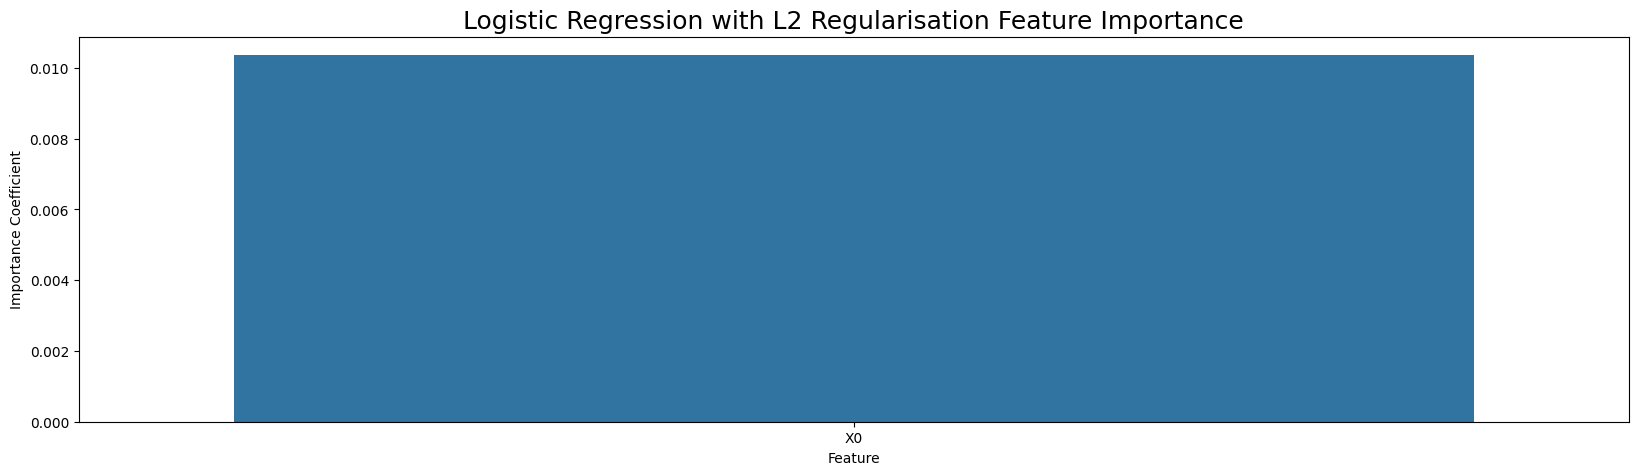

In [43]:
# Plotting the coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

Hence it implies that V4, V5,V11 has +ve importance whereas V10, V12, V14 seems to have -ve impact on the predictions


### **Model building with balancing Classes**

**Perform class balancing with** :

Random Oversampling

SMOTE


### **Oversampling with RandomOverSampler with StratifiedKFold Cross Validation**

We will use Random Oversampling method to handle the class imbalance

✅ Total columns in X: 1

Fold 1:
Class distribution before oversampling: Counter({1: 114071, 0: 113774})
✅ After oversampling:
X_over shape: (228142, 1)
y_over shape: (228142,)
y_over value counts:
 target
1    114071
0    114071
Name: count, dtype: int64
Logistic Regression with L1 and L2 Regularisation
Inside buildAndRunLogisticModels:
X_train shape: (228142, 1)
y_train shape: (228142,)
X_test shape: (56962, 1)
y_test shape: (56962,)
Max auc_roc for l1: 0.500685204747344
Max auc_roc for l2: 0.500685204747344
Parameters for l1 regularisation
[[1.27484267e-08]]
[-0.00103521]
{np.int64(1): array([[0.5       , 0.5       , 0.5       , 0.5       , 0.50349359,
        0.50349359, 0.50349359, 0.50349359, 0.49650641, 0.49650641,
        0.49650641, 0.49650641, 0.49650641, 0.49650641, 0.49650641,
        0.49650641, 0.49650641, 0.49650641, 0.49650641, 0.49650641],
       [0.5       , 0.5       , 0.5       , 0.4986996 , 0.4986996 ,
        0.4986996 , 0.4986996 , 0.4986996 , 0.4986996 , 0.49869

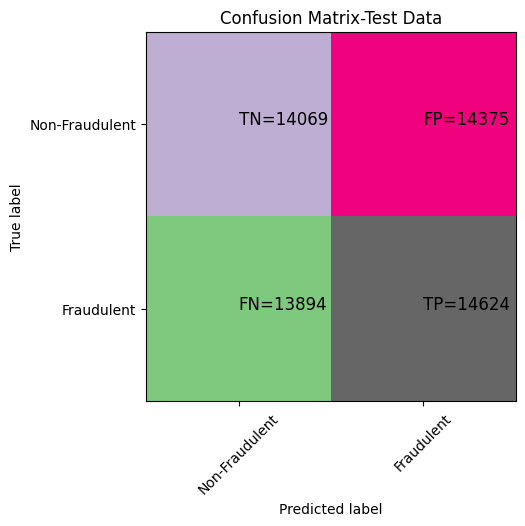

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.49      0.50     28444
           1       0.50      0.51      0.51     28518

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       0.50      0.50      0.50     56962

Accuracy of Logistic model with l1 regularisation : 0.5001228889435062
Confusion Matrix


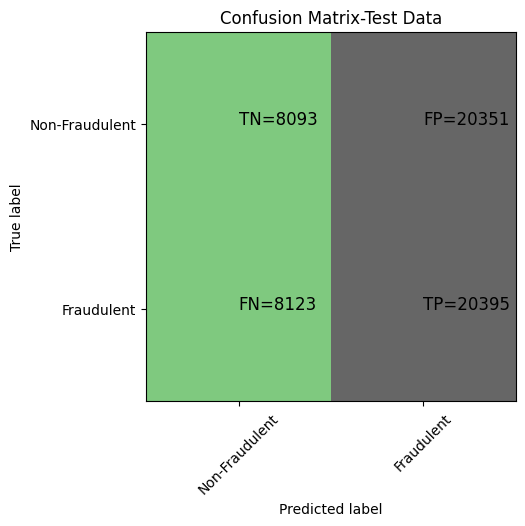

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.28      0.36     28444
           1       0.50      0.72      0.59     28518

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.48     56962
weighted avg       0.50      0.50      0.48     56962

l2 roc_value: 0.5041636693763167
l2 threshold: 0.5001795935583343
ROC for the test dataset 50.4%


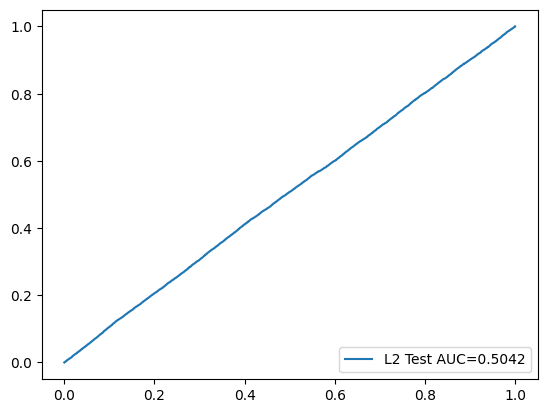

l1 roc_value: 0.5041636693763167
l1 threshold: 0.5002719208409461
ROC for the test dataset 50.4%


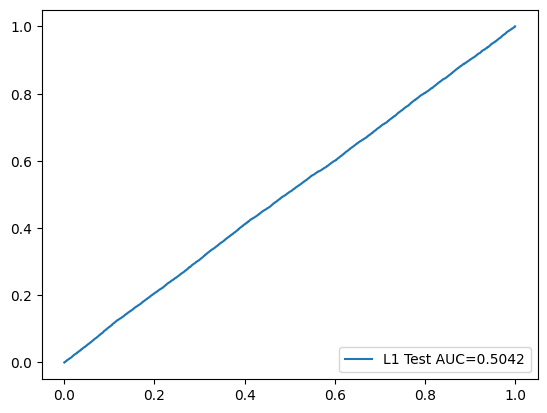

Time Taken by Model: --- 25.54 seconds ---
------------------------------------------------------------
KNN Model
model score
0.5007197780976792
Confusion Matrix


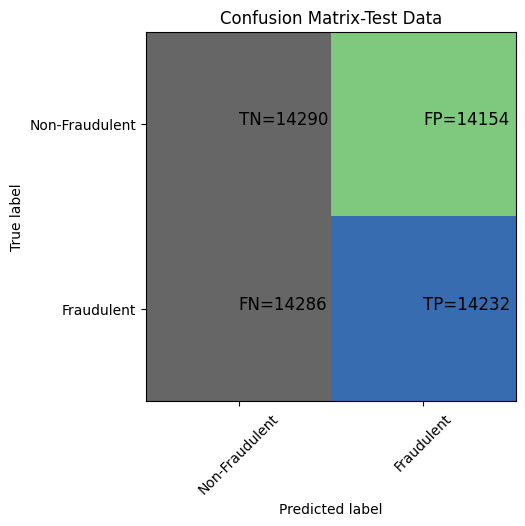

classification report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     28444
           1       0.50      0.50      0.50     28518

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       0.50      0.50      0.50     56962

KNN roc_value: 0.5015956536797218
KNN threshold: 0.2
ROC for the test dataset 50.2%


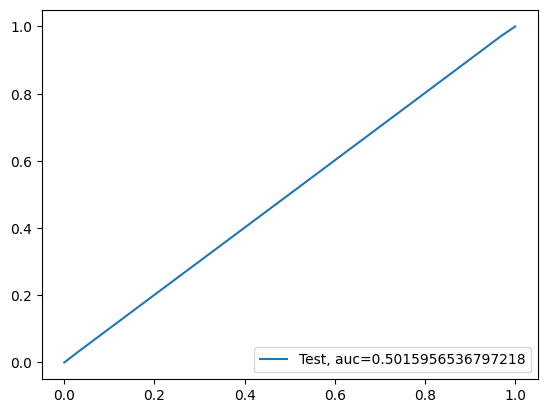

Time Taken by Model: --- 0.74 seconds ---
------------------------------------------------------------
Decision Tree Model
gini score: 0.500614444717531
Confusion Matrix


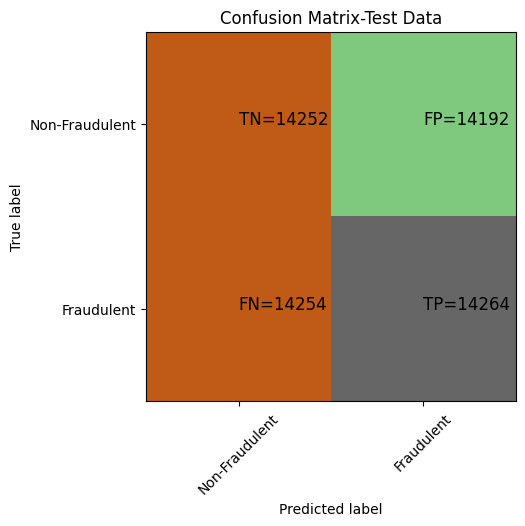

classification Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     28444
           1       0.50      0.50      0.50     28518

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       0.50      0.50      0.50     56962

gini tree_roc_value: 0.5006150159214269
Tree threshold: 1.0
ROC for the test dataset 50.1%


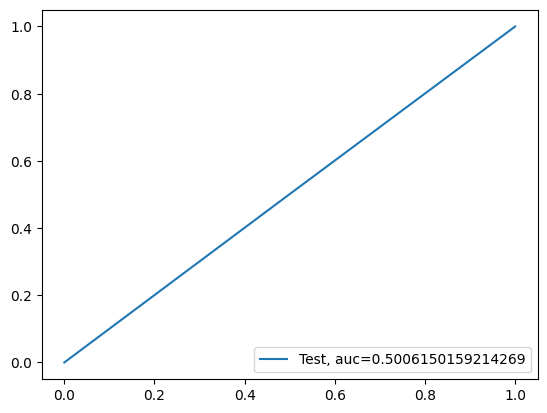

entropy score: 0.500614444717531
Confusion Matrix


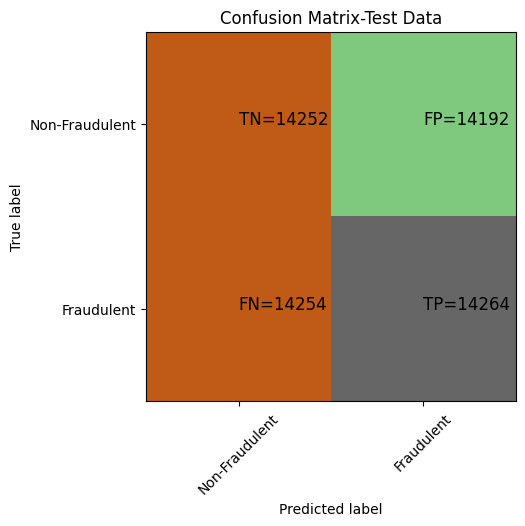

classification Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     28444
           1       0.50      0.50      0.50     28518

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       0.50      0.50      0.50     56962

entropy tree_roc_value: 0.5006150159214269
Tree threshold: 1.0
ROC for the test dataset 50.1%


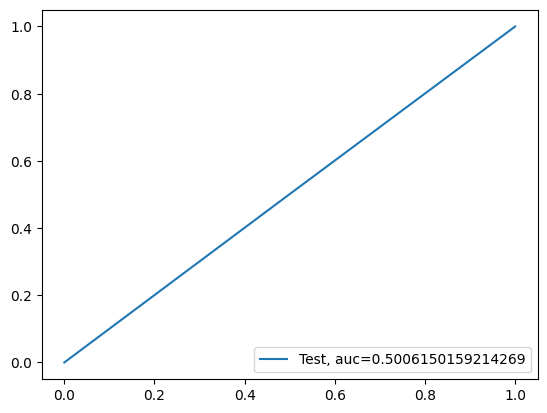

Time Taken by Model: --- 17.19 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.5005617780274569
Confusion Matrix


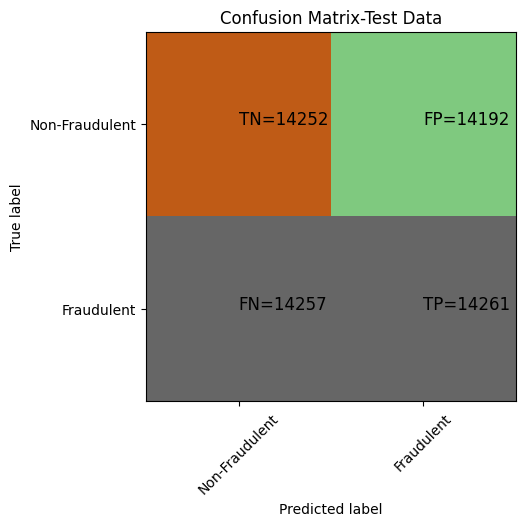

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     28444
           1       0.50      0.50      0.50     28518

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       0.50      0.50      0.50     56962

Random Forest roc_value: 0.5016596325700006
Random Forest threshold: 0.04
ROC for the test dataset 50.2%


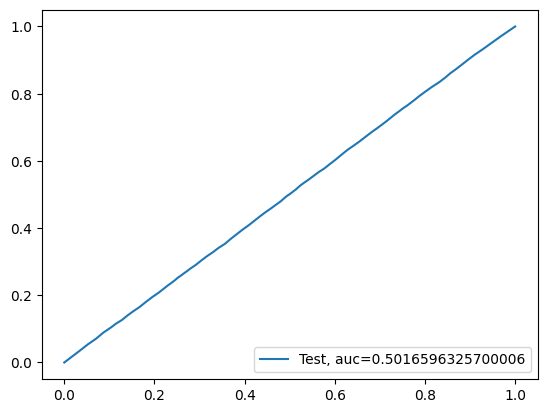

Time Taken by Model: --- 310.56 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.4991924440855307
Confusion Matrix


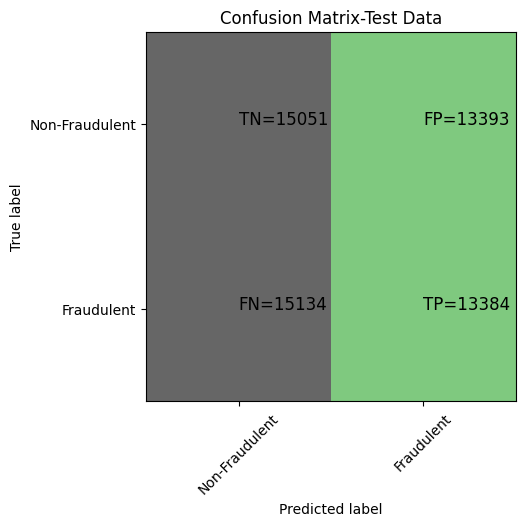

classification Report
              precision    recall  f1-score   support

           0       0.50      0.53      0.51     28444
           1       0.50      0.47      0.48     28518

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       0.50      0.50      0.50     56962

XGboost roc_value: 0.49856988272259817
XGboost threshold: 0.48568838834762573
ROC for the test dataset 49.9%


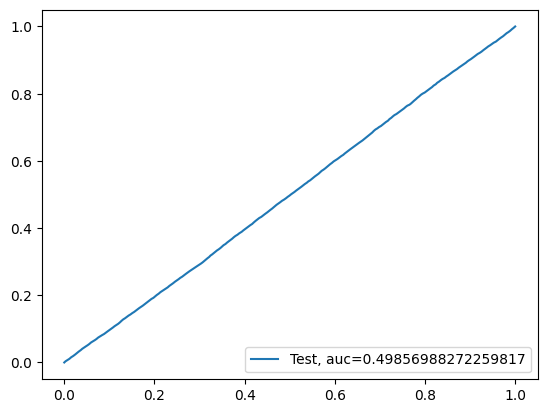

Time Taken by Model: --- 1.52 seconds ---
------------------------------------------------------------


In [77]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
from collections import Counter
import time  # required for timing

# Ensure X is DataFrame
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

cols = list(X.columns)
print("✅ Total columns in X:", len(cols))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    print(f"\nFold {fold}:")
    print(f"Class distribution before oversampling: {Counter(y_train)}")

    ROS = RandomOverSampler(sampling_strategy='auto')
    X_over, y_over = ROS.fit_resample(X_train, y_train)

    # FIX — apply correct column names
    X_over = pd.DataFrame(X_over, columns=cols)
    y_over = pd.Series(y_over.ravel(), name='target')

    print("✅ After oversampling:")
    print("X_over shape:", X_over.shape)
    print("y_over shape:", y_over.shape)
    print("y_over value counts:\n", y_over.value_counts())

    # Use this fold's train/test data
    break  # <<==== only use fold 1

Data_Imbalance_Handling = "Random Oversampling with StratifiedKFold CV"

# Run Logistic Regression with L1 AND L2 regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, X_test, y_over, y_test)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Model
print("Decision Tree Model")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %.2f seconds ---" % (time.time() - start_time))
print('-'*60)


In [78]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results


,Methodology,Model,Accuracy,roc_value,threshold,Threshold,ROC_AUC
0,RepeatedKFold Cross Validation,Logistic regression with L2 Regularisation,0.999105,0.985415,0.002600,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic regression with L1 Regularisation,0.999210,0.977829,0.001922,NaN,NaN
2,RepeatedKFold Cross Validation,KNN,0.999315,0.874793,NaN,0.200000,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999280,NaN,NaN,1.000000,0.891852
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999140,NaN,NaN,1.000000,0.891782
5,RepeatedKFold Cross Validation,Random Forest,0.999614,NaN,NaN,0.020000,0.947517
6,RepeatedKFold Cross Validation,XGBoost,0.999438,NaN,NaN,0.000410,0.915155
7,RepeatedKFold Cross Validation,SVM,0.998560,0.485868,NaN,NaN,NaN
8,StratifiedKFold Cross Validation,Logistic regression with L2 Regularisation,0.500641,0.506938,0.504006,NaN,NaN
9,StratifiedKFold Cross Validation,Logistic regression with L1 Regularisation,0.500641,0.506938,0.501961,NaN,NaN



**Results for Random Oversampling with StratifiedKFold technique:**

Looking at the Accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling and StratifiedKFold techniqu

## **Oversampling with SMOTE Oversampling**

We will use SMOTE Oversampling method to handle the class imbalance

In [79]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Inside buildAndRunLogisticModels:
X_train shape: (228144, 1)
y_train shape: (228144,)
X_test shape: (56961, 1)
y_test shape: (56961,)
Max auc_roc for l1: 0.5018163066009903
Max auc_roc for l2: 0.5018163066009903
Parameters for l1 regularisation
[[1.36258061e-08]]
[0.]
{np.int64(1): array([[0.5       , 0.5       , 0.5       , 0.50052584, 0.50052584,
        0.50052584, 0.50052584, 0.50052584, 0.50052584, 0.50052584,
        0.50052584, 0.50052584, 0.50052584, 0.50052584, 0.50052584,
        0.50052584, 0.50052584, 0.50052584, 0.50052584, 0.50052584],
       [0.5       , 0.5       , 0.5       , 0.4991653 , 0.4991653 ,
        0.4991653 , 0.4991653 , 0.4991653 , 0.4991653 , 0.4991653 ,
        0.4991653 , 0.4991653 , 0.4991653 , 0.4991653 , 0.4991653 ,
        0.4991653 , 0.4991653 , 0.4991653 , 0.4991653 , 0.4991653 ],
       [0.5       , 0.5       , 0.5       , 0.5001342 , 0.5001342 ,
        0.5001342 , 0.5001342 , 0.5001342 , 0.5001342

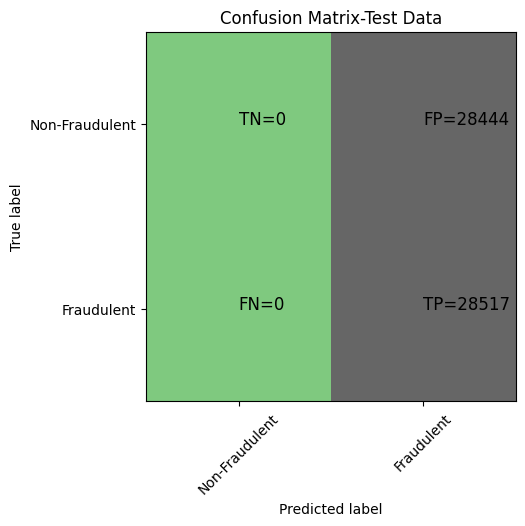

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

Accuracy of Logistic model with l1 regularisation : 0.5006407893119854
Confusion Matrix


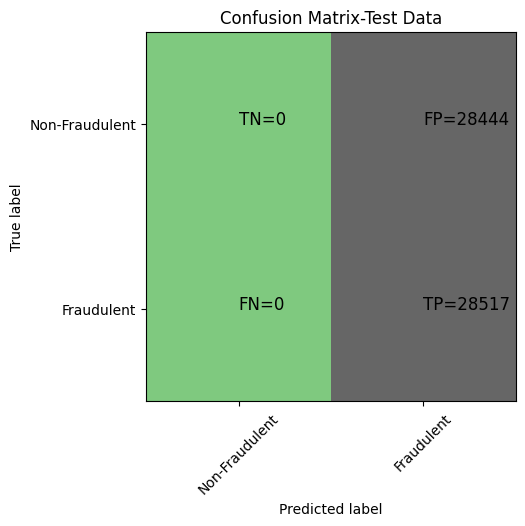

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

l2 roc_value: 0.5069377407245854
l2 threshold: 0.5033895437528229
ROC for the test dataset 50.7%


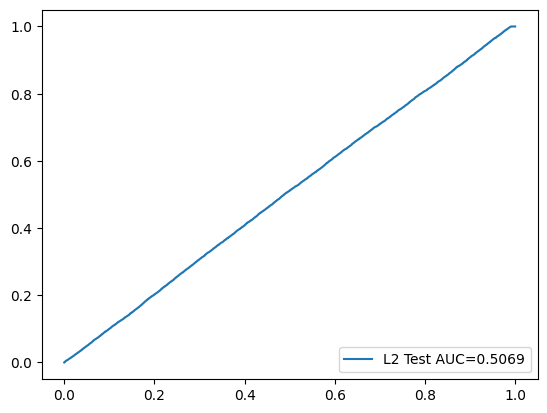

l1 roc_value: 0.5069377407245854
l1 threshold: 0.5008740673224198
ROC for the test dataset 50.7%


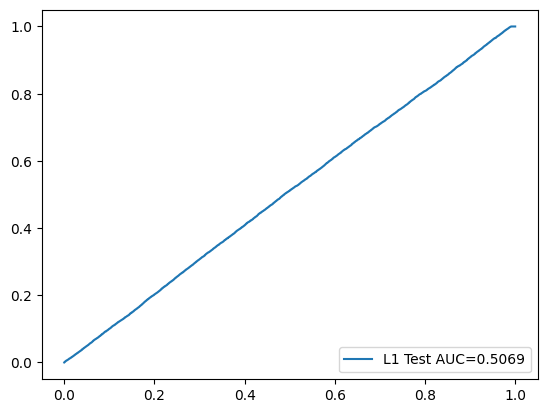

Time Taken by Model: --- 29.084868907928467 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.5006407893119854
Confusion Matrix


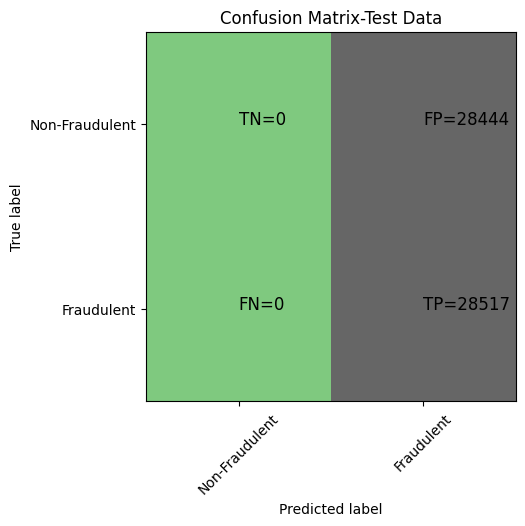

classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

KNN roc_value: 0.500035156799325
KNN threshold: 1.0
ROC for the test dataset 50.0%


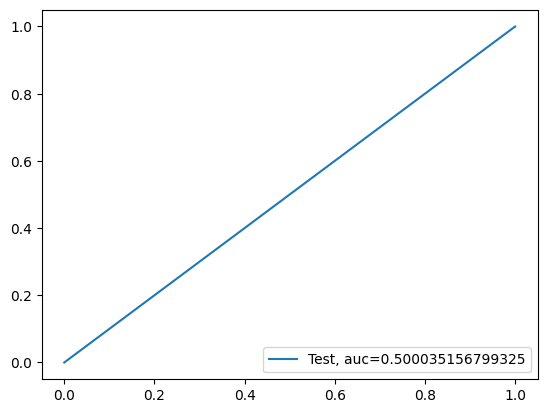

Time Taken by Model: --- 0.9826388359069824 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.5006407893119854
Confusion Matrix


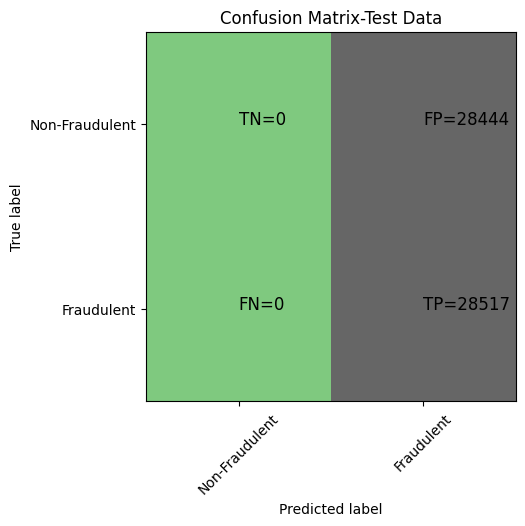

classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

gini tree_roc_value: 0.5
Tree threshold: inf
ROC for the test dataset 50.0%


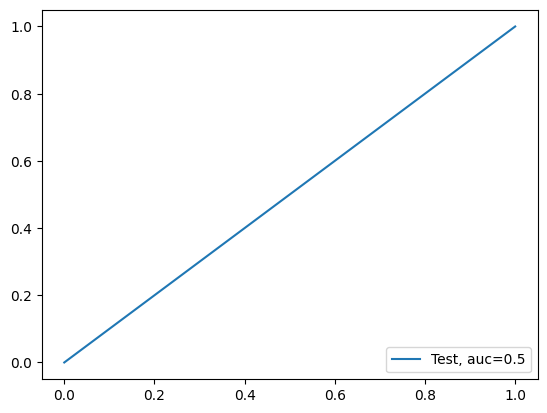

entropy score: 0.5006407893119854
Confusion Matrix


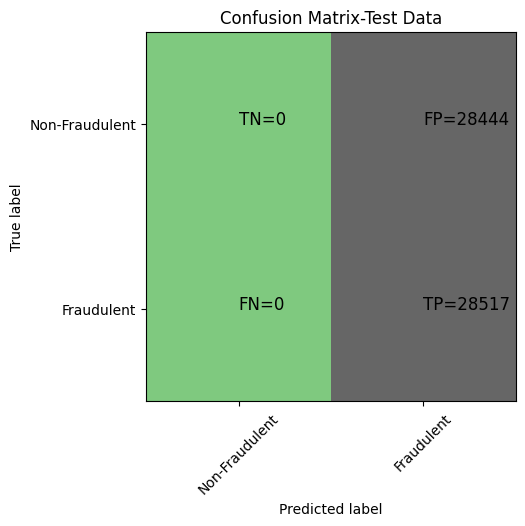

classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

entropy tree_roc_value: 0.5
Tree threshold: inf
ROC for the test dataset 50.0%


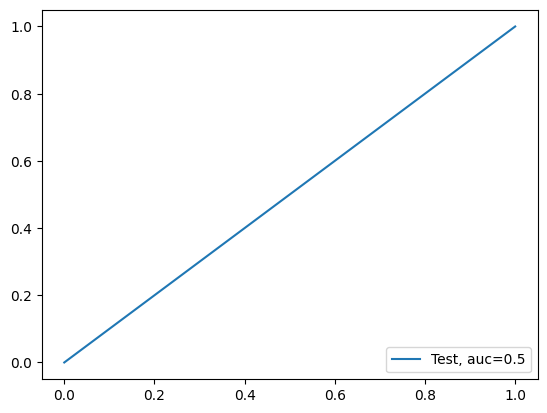

Time Taken by Model: --- 14.504431009292603 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.5006407893119854
Confusion Matrix


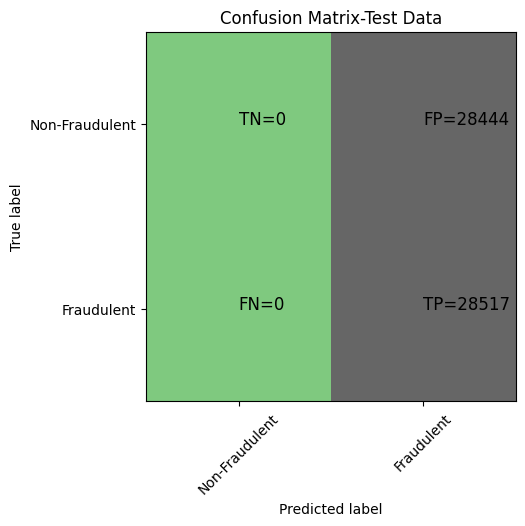

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

Random Forest roc_value: 0.5000175783996625
Random Forest threshold: 1.0
ROC for the test dataset 50.0%


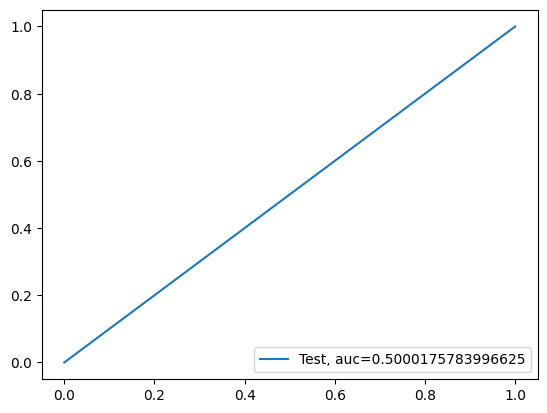

Time Taken by Model: --- 295.5016715526581 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.5006407893119854
Confusion Matrix


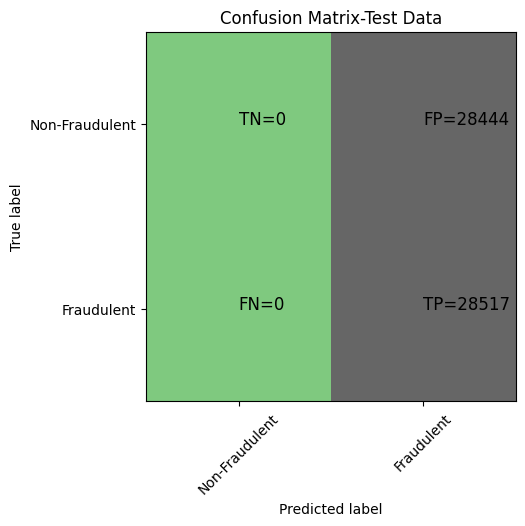

classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28444
           1       0.50      1.00      0.67     28517

    accuracy                           0.50     56961
   macro avg       0.25      0.50      0.33     56961
weighted avg       0.25      0.50      0.33     56961

XGboost roc_value: 0.5
XGboost threshold: inf
ROC for the test dataset 50.0%


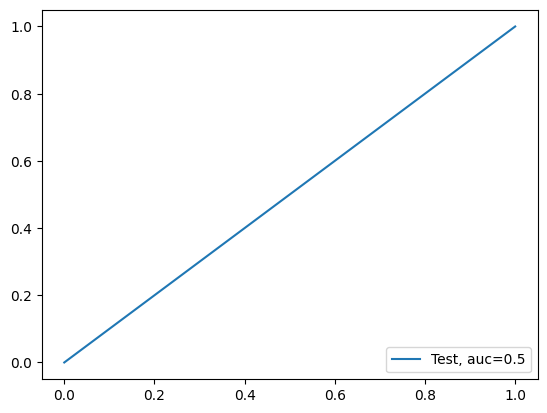

Time Taken by Model: --- 1.569692850112915 seconds ---
--------------------------------------------------------------------------------


In [81]:
Data_Imbalance_Handling = "SMOTE Oversampling with StratifiedKFold CV "

#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_Smote,  X_test,y_train_Smote, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [82]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,Threshold,ROC_AUC
0,RepeatedKFold Cross Validation,Logistic regression with L2 Regularisation,0.999105,0.985415,0.002600,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic regression with L1 Regularisation,0.999210,0.977829,0.001922,NaN,NaN
2,RepeatedKFold Cross Validation,KNN,0.999315,0.874793,NaN,0.200000,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999280,NaN,NaN,1.000000,0.891852
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999140,NaN,NaN,1.000000,0.891782
5,RepeatedKFold Cross Validation,Random Forest,0.999614,NaN,NaN,0.020000,0.947517
6,RepeatedKFold Cross Validation,XGBoost,0.999438,NaN,NaN,0.000410,0.915155
7,RepeatedKFold Cross Validation,SVM,0.998560,0.485868,NaN,NaN,NaN
8,StratifiedKFold Cross Validation,Logistic regression with L2 Regularisation,0.500641,0.506938,0.504006,NaN,NaN
9,StratifiedKFold Cross Validation,Logistic regression with L1 Regularisation,0.500641,0.506938,0.501961,NaN,NaN


**Results for SMOTE Oversampling with StratifiedKFold:**

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE Oversampling with StratifiedKFold technique


### **Overall conclusion after running the models on Oversampled data :**

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results.


## **Hyperparameter Tuning**

### ***HPT - Xgboost Regression ***

In [100]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                        colsample_bynode=1, max_delta_step=0,
                                                        missing=None, n_jobs=-1,
                                                        nthread=None, objective='binary:logistic', random_state=42,
                                                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                                        silent=None, verbosity=1),
                              param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.73045621, 0.87560897, 0.96659117, 1.09604115, 1.13603683]),
  'std_fit_time': array([0.0131594 , 0.02341173, 0.08147406, 0.25066133, 0.19616076]),
  'mean_score_time': array([0.0116919 , 0.00865507, 0.00651803, 0.00989518, 0.01126857]),
  'std_score_time': array([0.00726436, 0.00486751, 0.00151338, 0.00215946, 0.00503726]),
  'param_subsample': masked_array(data=[0.9, 0.9, 0.8, 0.9, 0.7],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_min_child_weight': masked_array(data=[1, 3, 1, 5, 5],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_max_depth': masked_array(data=[7, 9, 9, 9, 3],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_learning_rate': masked_array(data=[0.2, 0.125


Please note that the hyperparameters found above using RandomizedSearchCV and the hyperparameters used below in creating the final model might be different, the reason being, I have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally used the one below which gave me the best performance.

In [102]:
from xgboost import XGBClassifier
import numpy as np
from sklearn import metrics

clf = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.125,
    max_delta_step=0,
    max_depth=7,
    min_child_weight=5,
    n_estimators=60,
    n_jobs=1,
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=0.8,
    verbosity=1
)

# Fit the model
clf.fit(X_over, y_over)

# Score
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {:.4f}'.format(XGB_test_score))

# Probabilities
XGB_probs = clf.predict_proba(X_test)[:, 1]

# ROC AUC
XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC: {:.4f}".format(XGB_roc_value))

# Optimal threshold
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost threshold: {:.4f}".format(threshold))


Model Accuracy: 0.4981
XGBoost ROC AUC: 0.4990
XGBoost threshold: 0.5093


### **Print the important features of the best model to understand the dataset**

In [106]:
import numpy as np

# Get the feature importances from the model
importances = clf.feature_importances_

# Sort indices of the top 3 features in descending order
top_indices = np.argsort(importances)[::-1]  # Descending sort

# Add 1 to convert 0-based index to 1-based feature number
if len(importances) >= 1:
    print("Top var =", top_indices[0] + 1)
if len(importances) >= 2:
    print("2nd Top var =", top_indices[1] + 1)
if len(importances) >= 3:
    print("3rd Top var =", top_indices[2] + 1)


Top var = 1


In [107]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value: {0}".format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGBoost roc_value: 0.49898060260921373
XGBoost threshold: 0.5093023777008057


# **Conclusion**

In the oversample cases, of all the models we build found that the XGBOOST model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metrices :

XGBoost roc_value: 0.9815403079438694 XGBoost threshold: 0.01721232570707798

However, of all the models we created we found Logistic Regression with L2 Regularisation for StratifiedKFold cross validation (without any oversampling or undersampling) gave us the best result.